# Steering and Forward Propagation
This notebook shows a comparison between planners that use steering functions and the ones that use forward propagation methods

In [2]:
%load_ext autoreload
%autoreload 2
from mpb import MPB, MultipleMPB
from definitions import steer_functions, robot_models
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42
from copy import deepcopy
from trajectory import visualize
from plot_stats import plot_planner_stats


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:

mpb = MPB()
extend_function = 'reeds_shepp'
if(extend_function in robot_models):
    print("Found it")
mpb.set_steer_functions([extend_function])


In [19]:
# defining mpb
def create_mpb(planner : str, extend_function : str, planning_time):
    mpb = MPB()
    mpb["max_planning_time"] = planning_time
    mpb.set_planners([planner])
    if(extend_function in steer_functions):
        mpb.set_steer_functions([extend_function])
    if(extend_function in robot_models):
        mpb.set_robot_models_functions([extend_function])
    mpb.set_corridor_grid_env(radius=5, branches = 15)
    mpb["ompl.seed"] = 0
    mpb.set_id('comparison_extend_function_%s_%s' % (planner, extend_function))
    return mpb

# Comparing RRT with different extend function
In the following we compare the classical RRT algorithm, with 2 different extend function, namely the Reeds-Shepp one with the kinematic car model -- forward propagation.  

Available memory: 20.38 GB, limiting each MPB process to 62.5% usage (12.74 GB).
Creating pool of 2 processes.
Running MPB with ID comparison_extend_function_fprrt_kinematic_car (log file at comparison_extend_functions/comparison_extend_function_fprrt_kinematic_car.log)...
Running MPB with ID comparison_extend_function_rrt_reeds_shepp (log file at comparison_extend_functions/comparison_extend_function_rrt_reeds_shepp.log)...



Benchmark 0 (comparison_extend_function_rrt_reeds_shepp) finished successfully.

Benchmark 1 (comparison_extend_function_fprrt_kinematic_car) finished successfully.
All benchmarks succeeded.
Successfully merged [comparison_extend_functions/comparison_extend_function_rrt_reeds_shepp_results.json, comparison_extend_functions/comparison_extend_function_fprrt_kinematic_car_results.json] into comparison_extend_functions.json.


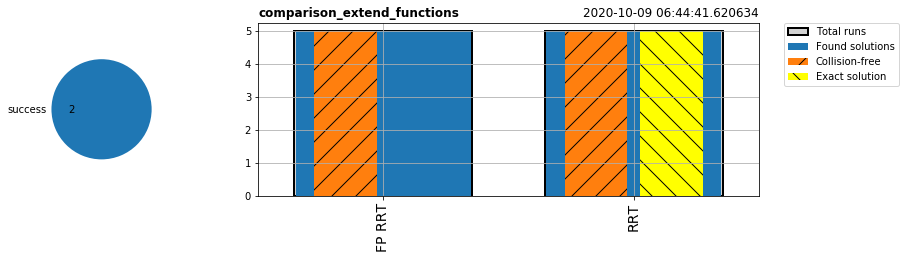

In [15]:
pool = MultipleMPB()
pool.benchmarks.append(create_mpb('rrt', 'reeds_shepp', 15))
pool.benchmarks.append(create_mpb('fprrt', 'kinematic_car', 15))
pool.run_parallel(runs=5, id='comparison_extend_functions', show_plot=True)
pool.merge('comparison_extend_functions.json')

Visualizing comparison_extend_functions.json


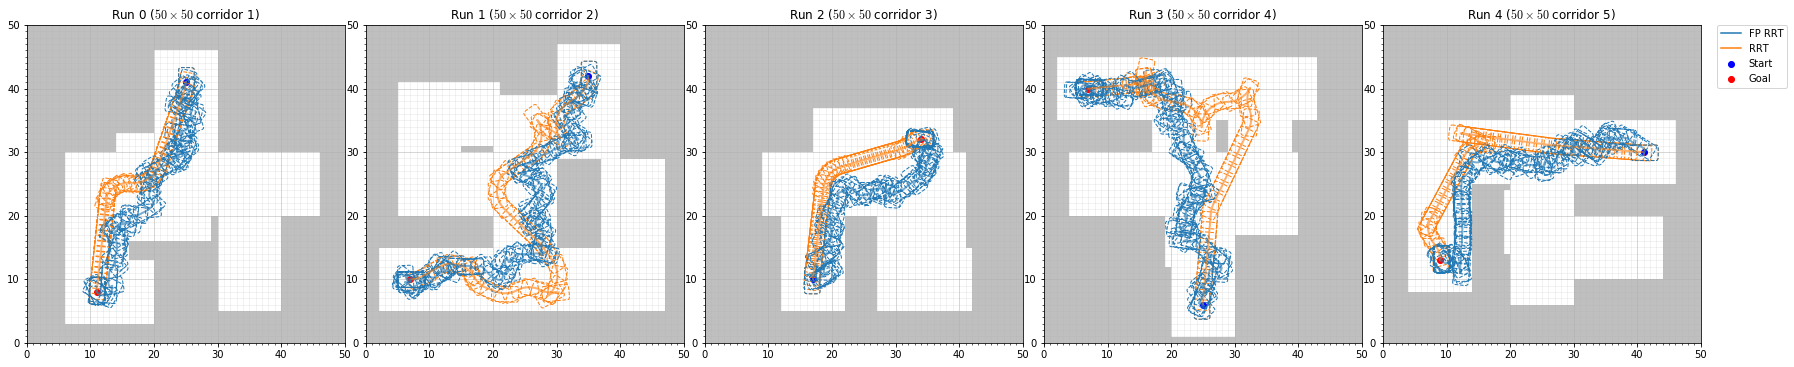

In [16]:
visualize('comparison_extend_functions.json', num_colors=10)

Visualizing comparison_extend_functions.json...


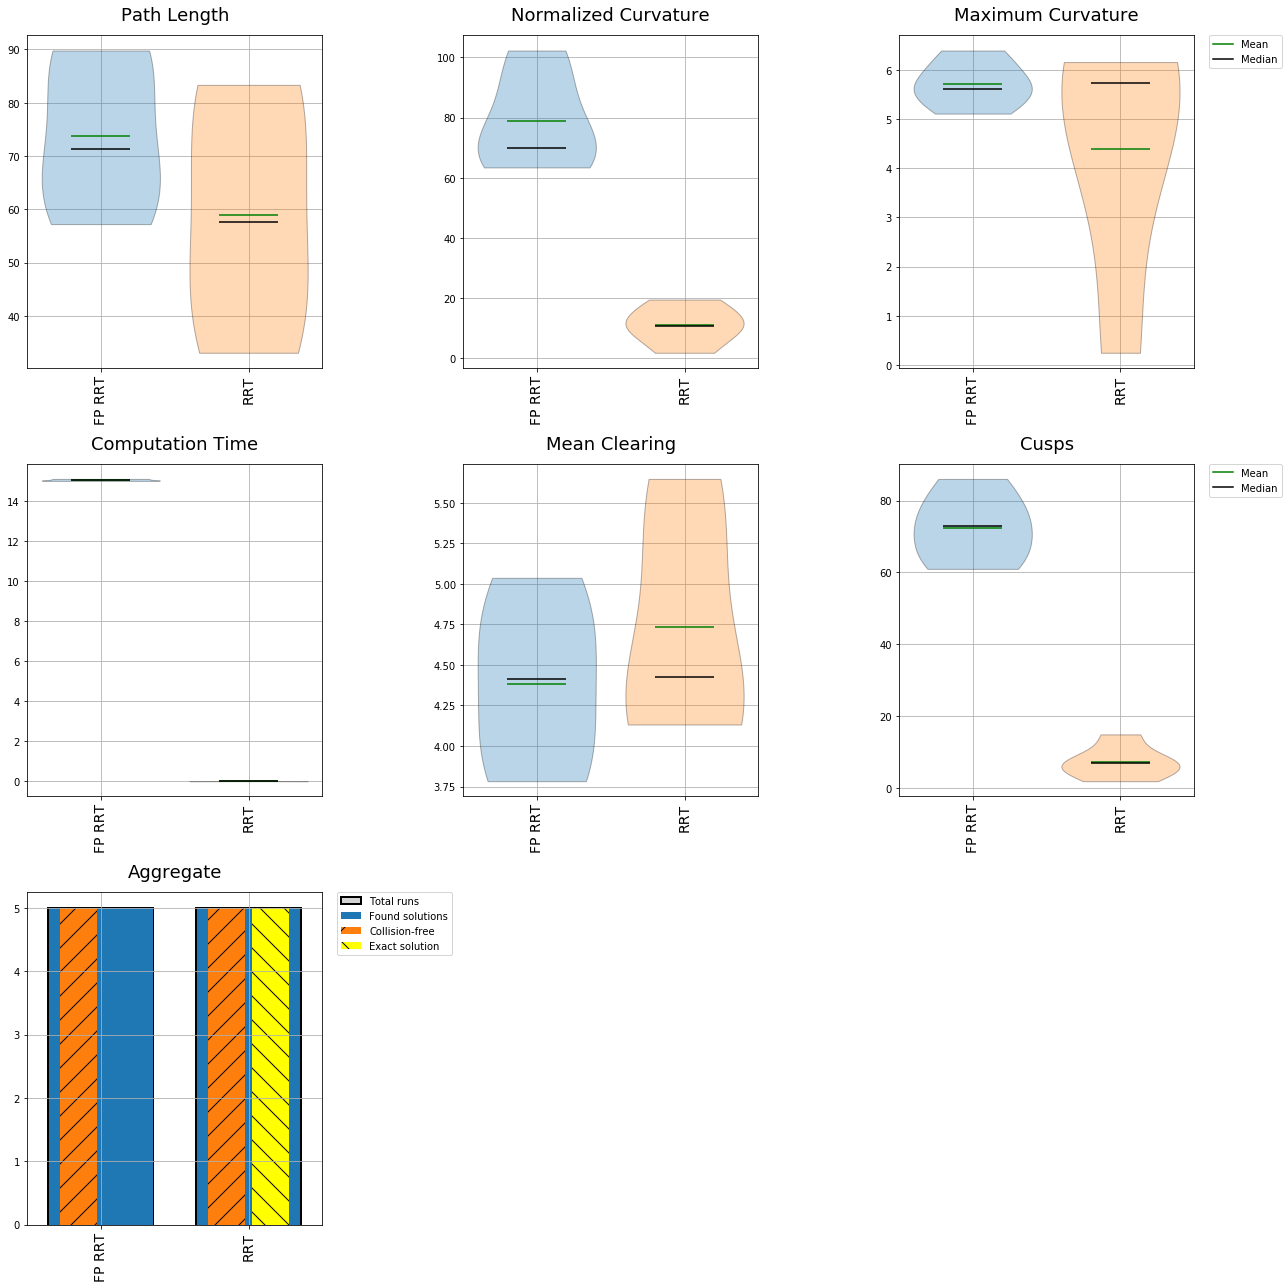

In [17]:
plot_planner_stats('comparison_extend_functions.json', num_colors=10)

We add now in the comparison also SST, an asymptotically near-optimal incremental version of RRT.

Available memory: 20.34 GB, limiting each MPB process to 62.5% usage (12.71 GB).
Creating pool of 3 processes.
Running MPB with ID comparison_extend_function_fprrt_kinematic_car (log file at comparison_extend_functions_with_sst/comparison_extend_function_fprrt_kinematic_car.log)...
Running MPB with ID comparison_extend_function_rrt_reeds_shepp (log file at comparison_extend_functions_with_sst/comparison_extend_function_rrt_reeds_shepp.log)...
Running MPB with ID comparison_extend_function_fpsst_kinematic_car (log file at comparison_extend_functions_with_sst/comparison_extend_function_fpsst_kinematic_car.log)...



Benchmark 0 (comparison_extend_function_rrt_reeds_shepp) finished successfully.

Benchmark 2 (comparison_extend_function_fpsst_kinematic_car) finished successfully.

Benchmark 1 (comparison_extend_function_fprrt_kinematic_car) finished successfully.
All benchmarks succeeded.
Successfully merged [comparison_extend_functions_with_sst/comparison_extend_function_rrt_reeds_shepp_results.json, comparison_extend_functions_with_sst/comparison_extend_function_fprrt_kinematic_car_results.json, comparison_extend_functions_with_sst/comparison_extend_function_fpsst_kinematic_car_results.json] into comparison_extend_functions_with_sst.json.


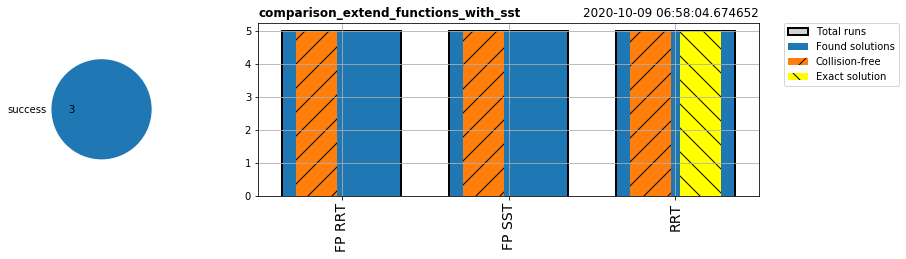

In [21]:
pool = MultipleMPB()
pool.benchmarks.append(create_mpb('rrt', 'reeds_shepp', 30))
pool.benchmarks.append(create_mpb('fprrt', 'kinematic_car', 30))
pool.benchmarks.append(create_mpb('fpsst', 'kinematic_car', 30))
pool.run_parallel(runs=5, id='comparison_extend_functions_with_sst', show_plot=True)
pool.merge('comparison_extend_functions_with_sst.json')

Visualizing comparison_extend_functions_with_sst.json


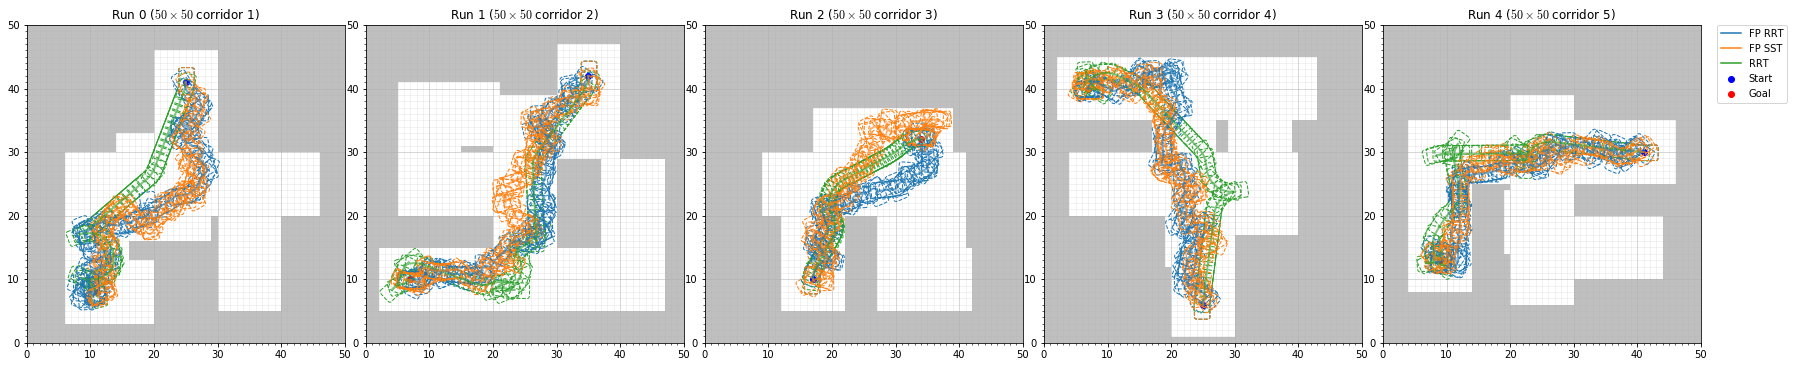

In [22]:
visualize('comparison_extend_functions_with_sst.json', num_colors=10)

Visualizing comparison_extend_functions_with_sst.json...


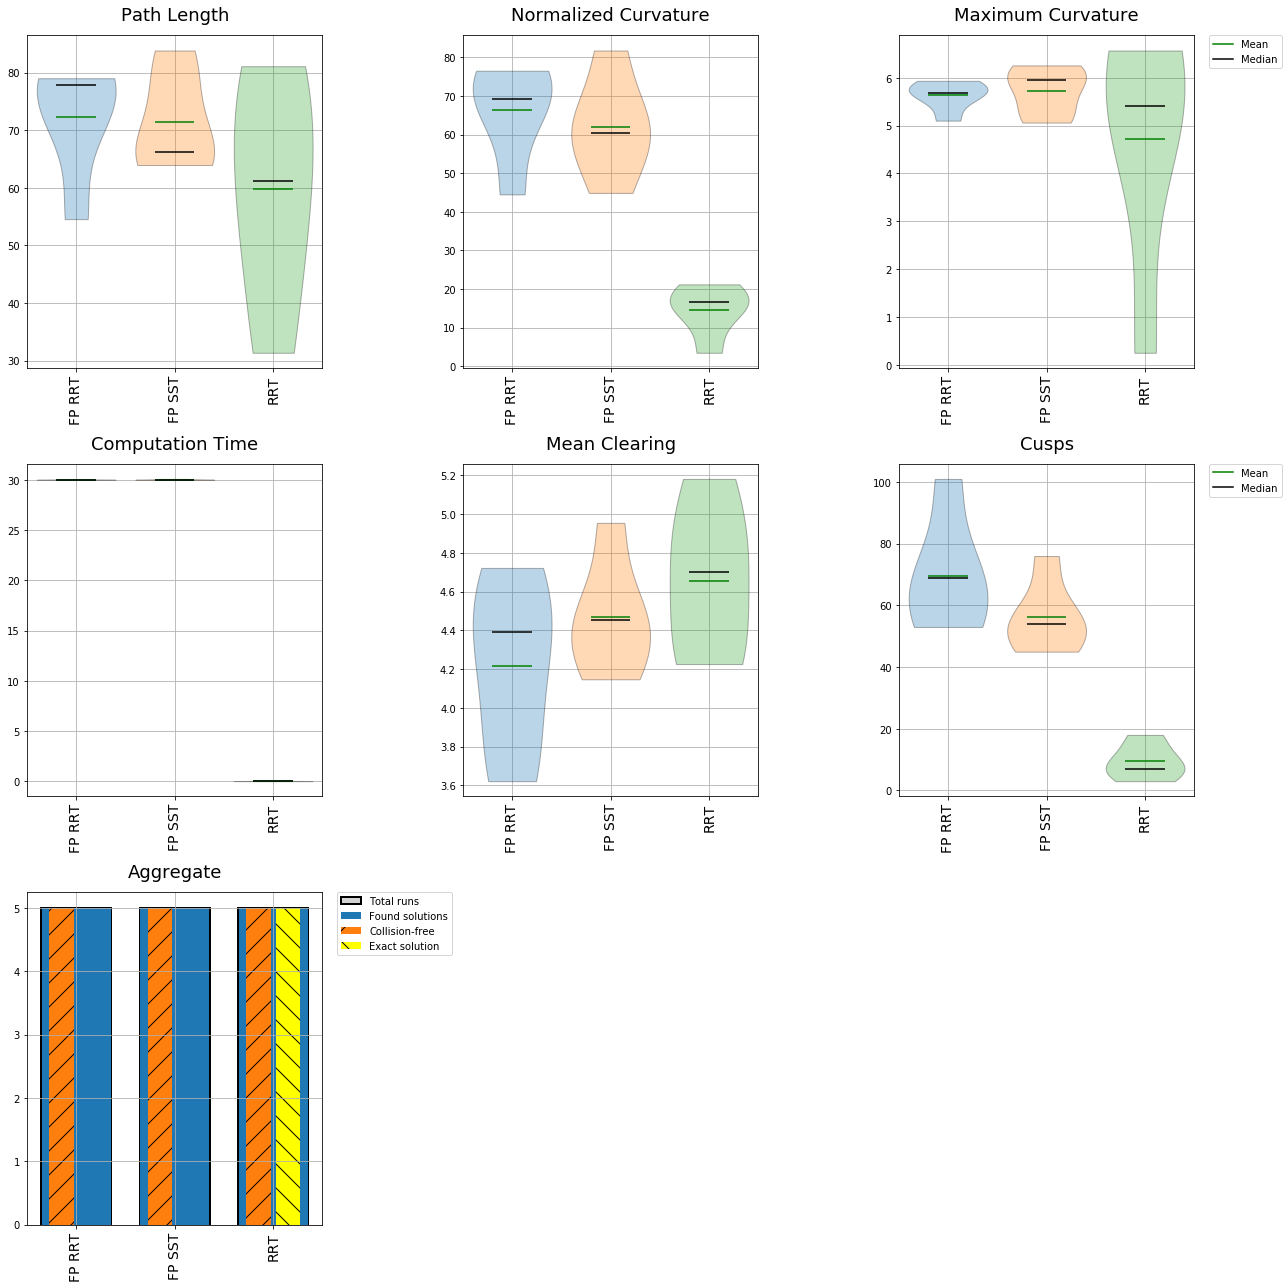

In [23]:
plot_planner_stats('comparison_extend_functions_with_sst.json', num_colors=10)